## Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
#### Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [206]:
!kaggle datasets download yasserh/uber-fares-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
License(s): CC0-1.0
uber-fares-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [255]:
df = pd.read_csv(r'uber-fares-dataset\uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [256]:
df.drop(["Unnamed: 0", "key"], axis = 1, inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [265]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [211]:
df.dropna(inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [212]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [213]:
df.duplicated().sum()

0

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [215]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [217]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

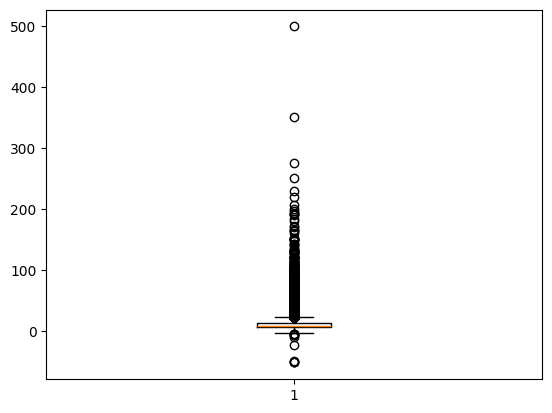

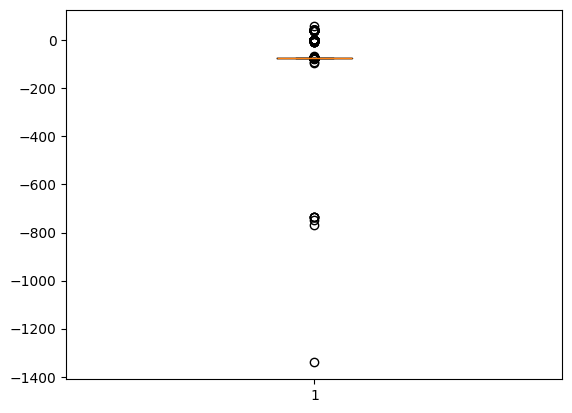

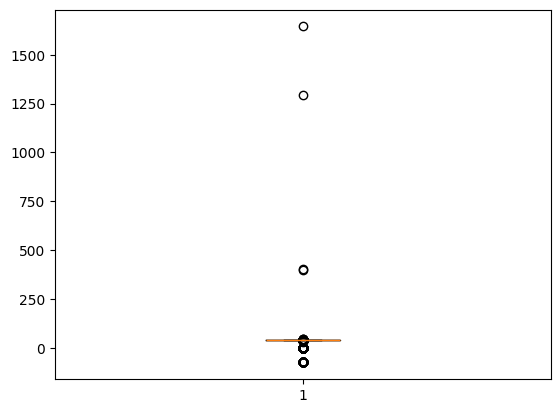

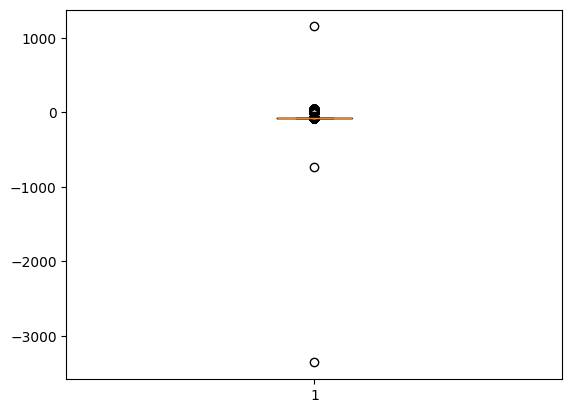

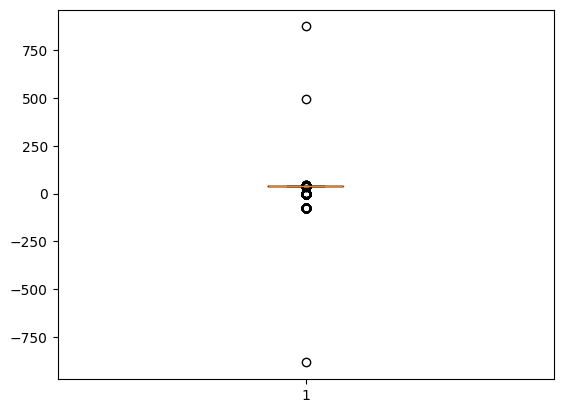

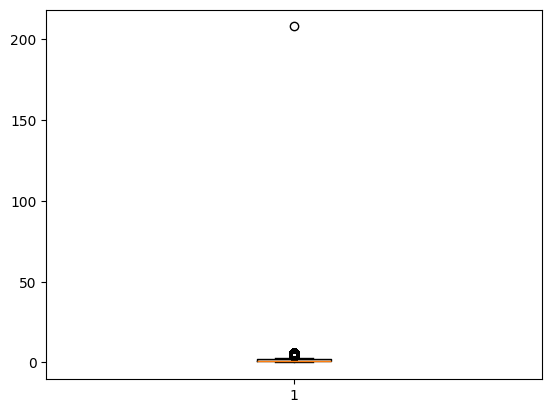

In [218]:
columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

for col in columns:
    plt.boxplot(df[col])
    plt.show()

In [219]:
q1 = df[columns].quantile(0.25)
q3 = df[columns].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1- 1.5 * iqr

In [220]:
df_cleaned = df[(df[columns] >= lower_limit) & (df[columns] <= upper_limit)]
df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,NaT,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,NaT,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,NaT,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,NaT,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,NaT,NaN,40.744085,-73.973082,40.761247,NaN
...,...,...,...,...,...,...,...
199995,3.0,NaT,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,NaT,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,NaN,NaT,-73.986017,40.756487,NaN,40.692588,2.0
199998,14.5,NaT,-73.997124,40.725452,-73.983215,40.695415,1.0


In [221]:
df_cleaned['pickup_datetime'] = df['pickup_datetime']
df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00+00:00,NaN,40.744085,-73.973082,40.761247,NaN
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,NaN,2009-06-29 00:42:00+00:00,-73.986017,40.756487,NaN,40.692588,2.0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.0


In [222]:
df_cleaned.isna().sum()

fare_amount          17166
pickup_datetime          0
pickup_longitude     13559
pickup_latitude       9423
dropoff_longitude    14200
dropoff_latitude     12145
passenger_count      22557
dtype: int64

In [223]:
df_cleaned.fillna(df_cleaned.mean(), inplace=True) 

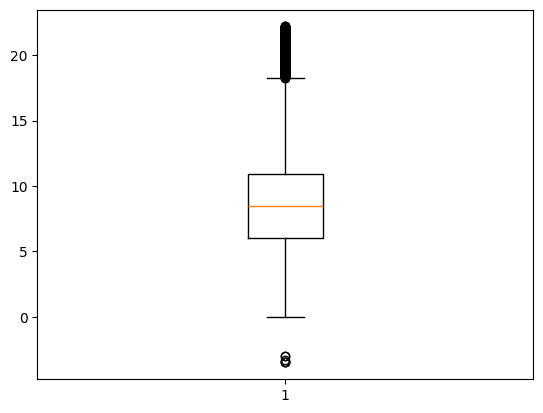

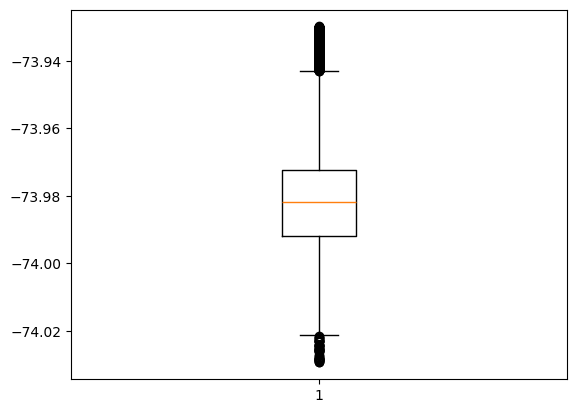

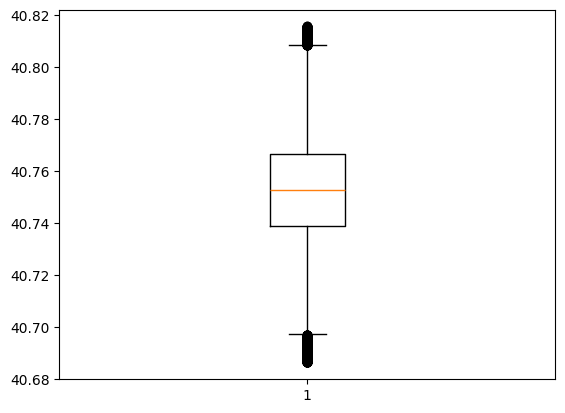

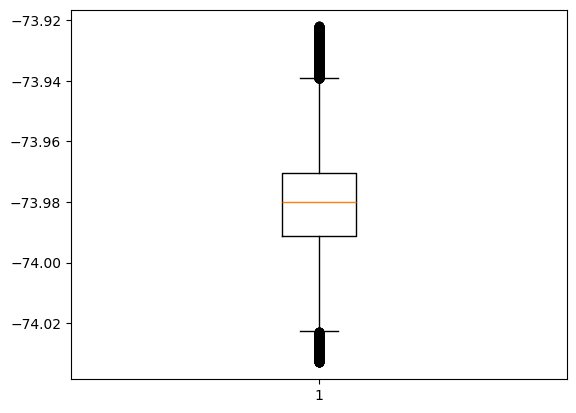

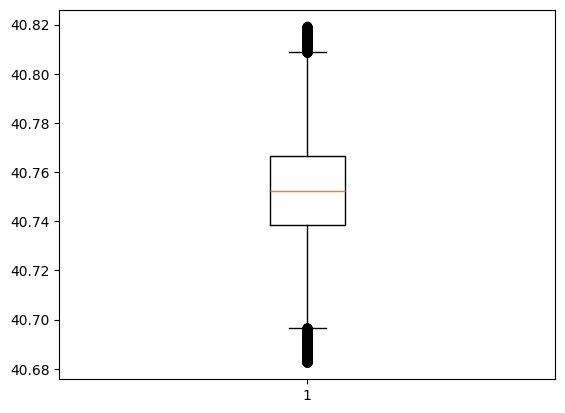

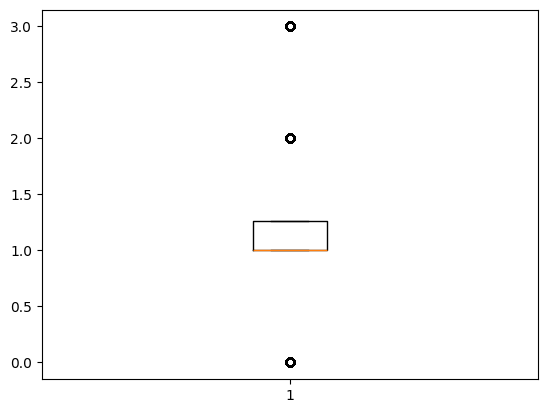

In [225]:
for col in columns:
    plt.boxplot(df_cleaned[col])
    plt.show()

In [226]:
corr = df_cleaned.corr()
corr 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.133771,-0.047213,-0.077822,0.030446,-0.095533,0.014310
pickup_datetime,0.133771,1.000000,-0.001377,-0.002416,0.009094,-0.006036,-0.019118
pickup_longitude,-0.047213,-0.001377,1.000000,0.653388,0.357036,0.302603,-0.020495
pickup_latitude,-0.077822,-0.002416,0.653388,1.000000,0.275736,0.440211,-0.017113
dropoff_longitude,0.030446,0.009094,0.357036,0.275736,1.000000,0.550245,-0.011318
dropoff_latitude,-0.095533,-0.006036,0.302603,0.440211,0.550245,1.000000,-0.009203
passenger_count,0.014310,-0.019118,-0.020495,-0.017113,-0.011318,-0.009203,1.000000


<Axes: >

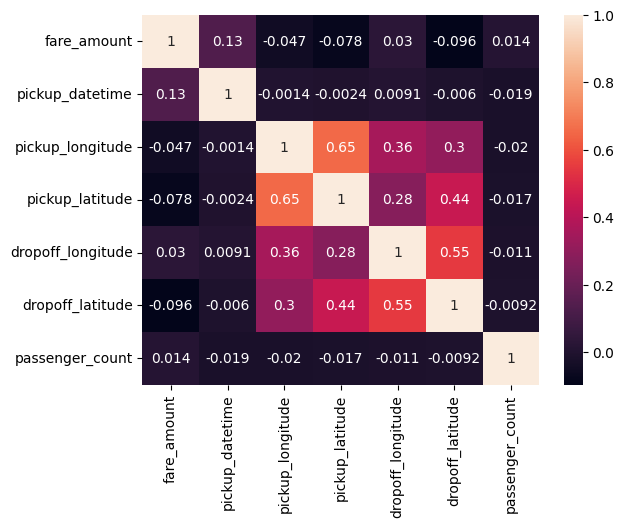

In [227]:
sns.heatmap(corr, annot=True)

In [228]:
import haversine as hs 

df_cleaned["distance"] = df_cleaned.apply(
    lambda row: hs.haversine(
        (row['pickup_latitude'], row['pickup_longitude']),
        (row['dropoff_latitude'], row['dropoff_longitude']),
    ),
    axis=1
)

df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.500000,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.000000,1.683325
1,7.700000,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.000000,2.457593
2,12.900000,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.000000,5.036384
3,5.300000,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.000000,1.661686
4,16.000000,2014-08-28 17:47:00+00:00,-73.981707,40.744085,-73.973082,40.761247,1.261956,2.041940
...,...,...,...,...,...,...,...,...
199995,3.000000,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.000000,0.112210
199996,7.500000,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.000000,1.875053
199997,8.940095,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.979946,40.692588,2.000000,7.123650
199998,14.500000,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.000000,3.539720


In [229]:
import datetime as dt 

df_cleaned['year'] =  df_cleaned['pickup_datetime'].dt.year
df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year
0,7.500000,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.000000,1.683325,2015
1,7.700000,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.000000,2.457593,2009
2,12.900000,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.000000,5.036384,2009
3,5.300000,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.000000,1.661686,2009
4,16.000000,2014-08-28 17:47:00+00:00,-73.981707,40.744085,-73.973082,40.761247,1.261956,2.041940,2014
...,...,...,...,...,...,...,...,...,...
199995,3.000000,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.000000,0.112210,2012
199996,7.500000,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.000000,1.875053,2014
199997,8.940095,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.979946,40.692588,2.000000,7.123650,2009
199998,14.500000,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.000000,3.539720,2015


In [230]:
df_cleaned['month'] = df_cleaned['pickup_datetime'].dt.month
df_cleaned['day'] = df_cleaned['pickup_datetime'].dt.day

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['time'] = df_cleaned['pickup_datetime'].dt.hour.apply(categorize_time_of_day)

In [231]:
df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,time
0,7.500000,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.000000,1.683325,2015,5,7,Evening
1,7.700000,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.000000,2.457593,2009,7,17,Night
2,12.900000,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.000000,5.036384,2009,8,24,Night
3,5.300000,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.000000,1.661686,2009,6,26,Morning
4,16.000000,2014-08-28 17:47:00+00:00,-73.981707,40.744085,-73.973082,40.761247,1.261956,2.041940,2014,8,28,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.000000,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.000000,0.112210,2012,10,28,Morning
199996,7.500000,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.000000,1.875053,2014,3,14,Night
199997,8.940095,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.979946,40.692588,2.000000,7.123650,2009,6,29,Night
199998,14.500000,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.000000,3.539720,2015,5,20,Noon


In [232]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['time'])
df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,time_Evening,time_Morning,time_Night,time_Noon
0,7.500000,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.000000,1.683325,2015,5,7,True,False,False,False
1,7.700000,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.000000,2.457593,2009,7,17,False,False,True,False
2,12.900000,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.000000,5.036384,2009,8,24,False,False,True,False
3,5.300000,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.000000,1.661686,2009,6,26,False,True,False,False
4,16.000000,2014-08-28 17:47:00+00:00,-73.981707,40.744085,-73.973082,40.761247,1.261956,2.041940,2014,8,28,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.000000,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.000000,0.112210,2012,10,28,False,True,False,False
199996,7.500000,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.000000,1.875053,2014,3,14,False,False,True,False
199997,8.940095,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.979946,40.692588,2.000000,7.123650,2009,6,29,False,False,True,False
199998,14.500000,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.000000,3.539720,2015,5,20,False,False,False,True


In [233]:
df_cleaned.drop('time_Noon', axis = 1, inplace=True)
df_cleaned

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,time_Evening,time_Morning,time_Night
0,7.500000,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.000000,1.683325,2015,5,7,True,False,False
1,7.700000,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.000000,2.457593,2009,7,17,False,False,True
2,12.900000,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.000000,5.036384,2009,8,24,False,False,True
3,5.300000,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.000000,1.661686,2009,6,26,False,True,False
4,16.000000,2014-08-28 17:47:00+00:00,-73.981707,40.744085,-73.973082,40.761247,1.261956,2.041940,2014,8,28,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.000000,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.000000,0.112210,2012,10,28,False,True,False
199996,7.500000,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.000000,1.875053,2014,3,14,False,False,True
199997,8.940095,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.979946,40.692588,2.000000,7.123650,2009,6,29,False,False,True
199998,14.500000,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.000000,3.539720,2015,5,20,False,False,False


In [234]:
df_cleaned.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1, inplace = True)
df_cleaned

,fare_amount,pickup_datetime,passenger_count,distance,year,month,day,time_Evening,time_Morning,time_Night
0,7.500000,2015-05-07 19:52:06+00:00,1.000000,1.683325,2015,5,7,True,False,False
1,7.700000,2009-07-17 20:04:56+00:00,1.000000,2.457593,2009,7,17,False,False,True
2,12.900000,2009-08-24 21:45:00+00:00,1.000000,5.036384,2009,8,24,False,False,True
3,5.300000,2009-06-26 08:22:21+00:00,3.000000,1.661686,2009,6,26,False,True,False
4,16.000000,2014-08-28 17:47:00+00:00,1.261956,2.041940,2014,8,28,True,False,False
...,...,...,...,...,...,...,...,...,...,...
199995,3.000000,2012-10-28 10:49:00+00:00,1.000000,0.112210,2012,10,28,False,True,False
199996,7.500000,2014-03-14 01:09:00+00:00,1.000000,1.875053,2014,3,14,False,False,True
199997,8.940095,2009-06-29 00:42:00+00:00,2.000000,7.123650,2009,6,29,False,False,True
199998,14.500000,2015-05-20 14:56:25+00:00,1.000000,3.539720,2015,5,20,False,False,False


In [235]:
df_cleaned.drop('pickup_datetime', axis=1, inplace = True)

In [236]:
df_cleaned

,fare_amount,passenger_count,distance,year,month,day,time_Evening,time_Morning,time_Night
0,7.500000,1.000000,1.683325,2015,5,7,True,False,False
1,7.700000,1.000000,2.457593,2009,7,17,False,False,True
2,12.900000,1.000000,5.036384,2009,8,24,False,False,True
3,5.300000,3.000000,1.661686,2009,6,26,False,True,False
4,16.000000,1.261956,2.041940,2014,8,28,True,False,False
...,...,...,...,...,...,...,...,...,...
199995,3.000000,1.000000,0.112210,2012,10,28,False,True,False
199996,7.500000,1.000000,1.875053,2014,3,14,False,False,True
199997,8.940095,2.000000,7.123650,2009,6,29,False,False,True
199998,14.500000,1.000000,3.539720,2015,5,20,False,False,False


In [237]:
corr= df_cleaned.corr()
corr

,fare_amount,passenger_count,distance,year,month,day,time_Evening,time_Morning,time_Night
fare_amount,1.000000,0.014310,0.651039,0.128978,0.025209,0.006558,-0.007184,-0.028186,0.050000
passenger_count,0.014310,1.000000,0.008385,-0.019886,0.005574,0.001337,0.015390,-0.071783,0.057165
distance,0.651039,0.008385,1.000000,0.012035,0.005651,0.003592,-0.024698,-0.027308,0.103726
year,0.128978,-0.019886,0.012035,1.000000,-0.115860,-0.012165,-0.006668,0.002172,0.002844
month,0.025209,0.005574,0.005651,-0.115860,1.000000,-0.017358,-0.003098,-0.002330,0.006923
day,0.006558,0.001337,0.003592,-0.012165,-0.017358,1.000000,-0.000402,-0.004932,0.007329
time_Evening,-0.007184,0.015390,-0.024698,-0.006668,-0.003098,-0.000402,1.000000,-0.263715,-0.326685
time_Morning,-0.028186,-0.071783,-0.027308,0.002172,-0.002330,-0.004932,-0.263715,1.000000,-0.414219
time_Night,0.050000,0.057165,0.103726,0.002844,0.006923,0.007329,-0.326685,-0.414219,1.000000


<Axes: >

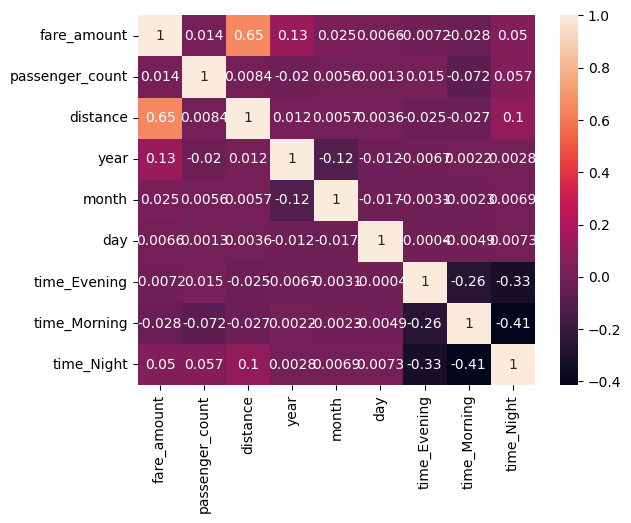

In [238]:
sns.heatmap(corr, annot=True)

In [245]:
df_final = df_cleaned[['fare_amount', 'distance', 'year']]
df_final

,fare_amount,distance,year
0,7.500000,1.683325,2015
1,7.700000,2.457593,2009
2,12.900000,5.036384,2009
3,5.300000,1.661686,2009
4,16.000000,2.041940,2014
...,...,...,...
199995,3.000000,0.112210,2012
199996,7.500000,1.875053,2014
199997,8.940095,7.123650,2009
199998,14.500000,3.539720,2015


In [246]:
x = df_final[['distance', 'year']]
y = df_final['fare_amount']

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data

array([[-0.43366277,  1.75478085],
       [-0.00898198, -1.47729002],
       [ 1.4054671 , -1.47729002],
       ...,
       [ 2.55031827, -1.47729002],
       [ 0.58455728,  1.75478085],
       [ 1.61466612, -0.93861154]])

In [248]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 43)

In [249]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [251]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

print(mean_squared_error(y_test, y_pred_lr))
print(root_mean_squared_error(y_test, y_pred_lr))
print(r2_score(y_test, y_pred_lr))

8.902729707704328
2.9837442430115098
0.43216640255993866


In [252]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)


In [253]:
print(mean_squared_error(y_test, y_pred_rfr))
print(root_mean_squared_error(y_test, y_pred_rfr))
print(r2_score(y_test, y_pred_rfr))

10.066047320953091
3.17270347195465
0.3579677188994902
